<a href="https://colab.research.google.com/github/fishenzone/Projects/blob/main/projects/test_tasks/task_1_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from skimage import data, io
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from PIL import Image, ImageFilter, ImageDraw, ImageOps
import IPython.display as display
import random
%matplotlib inline
plt.style.use('dark_background')

# Задание #1 Numpy
## Инструменты для выполнения задания

### Jupyter Notebook
  * [Three Things I Love About Jupyter Notebooks](http://blog.kaggle.com/2015/12/07/three-things-i-love-about-jupyter-notebooks/)
  * [Jupyter Notebook Users Manual](http://jupyter.cs.brynmawr.edu/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb)
  * [Продвинутые трюки с jupyter часть 1](http://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/)
  * [Продвинутые трюки с jupyter часть 2](http://blog.dominodatalab.com/interactive-dashboards-in-jupyter/)
  * [Галерея интересных ноутбуков](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

### Библиотеки Python

  * [NumPy](http://www.numpy.org/)
    - [Tutorial Brief](http://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/IPython-Tutorial/4%20-%20Numpy%20Basics.ipynb)
    - [Scipy Lecture Notes](http://www.scipy-lectures.org/). 
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — эмуляция функционала графопостроений в Matlab
    - [галерея примеров](http://matplotlib.org/gallery.html)
  * [skimage](http://scikit-image.org/)

## Разминка
1. Создайте список (list) и массив (ndarray), содержащие числа от 0 до 100 000 000.

In [ ]:
lst = [*range(0, 100_000_001, 1)]
ndarray = np.arange(0, 100_000_001, 1)

print(f'Type of first variable: {type(lst)}\nType of second variable: {type(ndarray)}')

Type of first variable: <class 'list'>
Type of second variable: <class 'numpy.ndarray'>


2. Напишите функцию, которая вычисляет сумму всех элементов массива, используя цикл for.

In [ ]:
def sum_for(array):
  sum = 0
  for i in array:
    sum += i

3. Замерьте: время выполнения этой функции на списке и на массиве, время выполнения функции sum() на списке и на массиве, время выполнения функции numpy.sum() на списке и на массиве.

In [ ]:
%timeit sum_for(lst)
%timeit sum_for(ndarray)

1 loop, best of 5: 6.34 s per loop
1 loop, best of 5: 11.7 s per loop


In [ ]:
%timeit sum(lst)
%timeit sum(ndarray)

1 loop, best of 5: 923 ms per loop
1 loop, best of 5: 8.47 s per loop


In [ ]:
%timeit np.sum(lst)
%timeit np.sum(ndarray)

1 loop, best of 5: 6.87 s per loop
10 loops, best of 5: 104 ms per loop


4. Объясните полученные результаты. **Везде далее запрещено использовать циклы.** *Numpy имеет большинство необходимых функций для операций над тензорами, например [Numerical operations on arrays](http://www.scipy-lectures.org/intro/numpy/operations.html).*

Numpy массив в цикле и python function sum показал скорость даже хуже чем python list. Потому что в numpy вообще не принято использовать ничего из чистого Python, ведь все что нужно - есть в numpy и указано по ссылке, которую вы выше сами же и предоставили.

5. Загрузите и  выведите на экран картинку autodoc.png. *Используйте библиотеки skimage и matplotlib.*

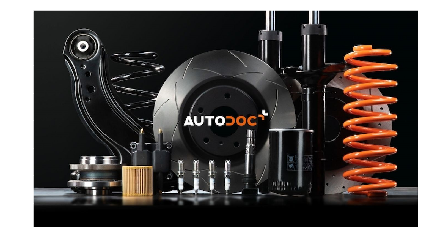

In [ ]:
image = io.imread('autodoc.png')
io.imshow(image) 
io.show()

6. Получите и интерпретируйте размеры картинки.

In [6]:
class image_:
  def __init__(self, image, draw, width, height, pix):
    self.image = image
    self.draw = draw
    self.width = width
    self.height = height
    self.pix = pix

def image_val():
  image = Image.open('autodoc.png').convert('RGB')
  draw = ImageDraw.Draw(image) 
  width = image.size[0]  
  height = image.size[1]  
  pix = image.load()
  return (image, draw, width, height, pix)

image = image_(*image_val()).image
width, height = image.size
print(f'Width: {width} pixels.\nHeight: {height} pixels.')

Width: 1400 pixels.
Height: 788 pixels.


Well, the class I've written was most certainly useless.

Anyway, here's another appoach.

In [7]:
print(f'Width: {image_val()[0].size[0]} pixels.\nHeight: {image_val()[0].size[1]} pixels.')

Width: 1400 pixels.
Height: 788 pixels.


7. Выведите верхнюю и левую половины изображения. 

8. Выведите произвольный прямоугольник изображения.

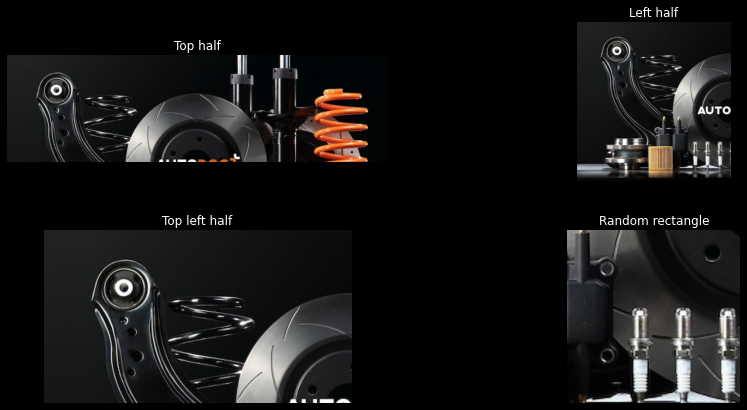

In [ ]:
im_left_area = (0, 0, 700, 788)
im_top_area = (0, 0, 1400, 394)
im_top_left_area = (0, 0, 700, 394)
im_random_area = (444, 444, 666, 666)
im_left = image.crop(im_left_area)
im_top = image.crop(im_top_area)
im_top_left = image.crop(im_top_left_area)
im_random = image.crop(im_random_area)

fig = plt.figure(figsize=(15, 7))
rows, columns = 2, 2

fig.add_subplot(rows, columns, 1)
plt.imshow(im_top)
plt.axis('off')
plt.title('Top half')

fig.add_subplot(rows, columns, 2)
plt.imshow(im_left)
plt.axis('off')
plt.title('Left half')

fig.add_subplot(rows, columns, 3)
plt.imshow(im_top_left)
plt.axis('off')
plt.title('Top left half')

fig.add_subplot(rows, columns, 4)
plt.imshow(im_random)
plt.axis('off')
plt.title('Random rectangle')
plt.show();

9. Выведите каждый канал изображения отдельно.

In [ ]:
print(f'Every channel separately: {image.getbands()}')

Every channel separately: ('R', 'G', 'B')


10. Получите черно-белое изображение путем усреднения по каналам. *Сначала самостоятельно реализуйте усреднение, затем правильно воспользуйтесь функцией numpy.mean()* 
11. Получите негатив для черно-белого изображения.
12. Бинаризуйте черно-белое изображение по некоторому порогу.

###Black 'n' White

Без цикла.

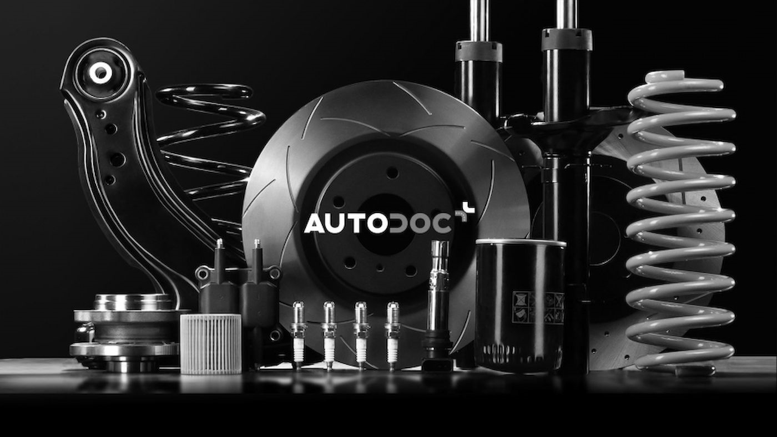

In [ ]:
compr = tuple(int(x/1.8) for x in image.size)
Image.open('autodoc.png').convert('L').resize(compr)

###*Negative* from black n white image

Без цикла.

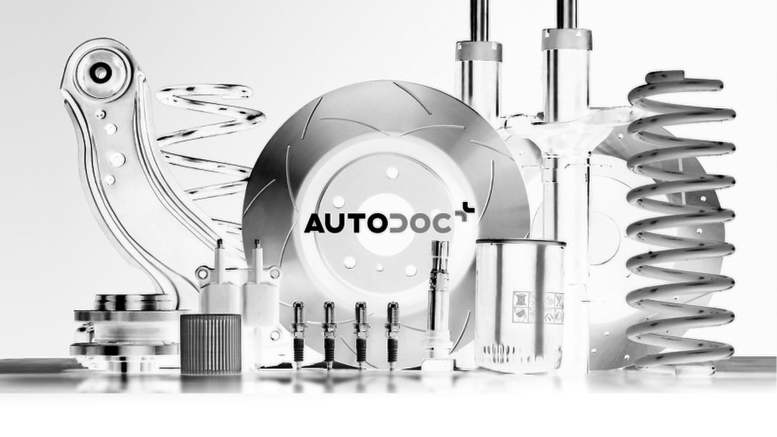

In [ ]:
ImageOps.invert(Image.open('autodoc.png').convert('L')).resize(compr)

### Binarize BW image with threshold

Без цикла. Или...

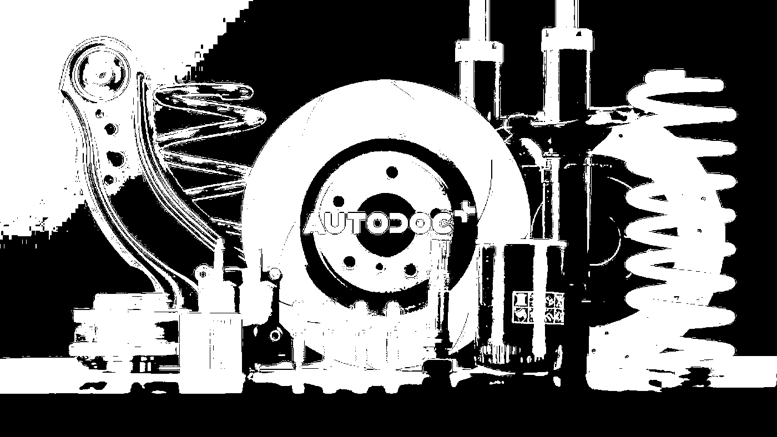

In [ ]:
threshold = int(66*random.random())
Image.open('autodoc.png').convert('RGB').convert('L').point(lambda x: 255 if x > threshold else 0).resize(compr)

Как я понял вам нравятся циклы, поэтому я написал функцию со множеством циклов.Она выдает правильные результаты на 10, 11 и 12 задания, т.е. тоже самое, что я сделал и выше. Но! С циклами!


Black and White Image



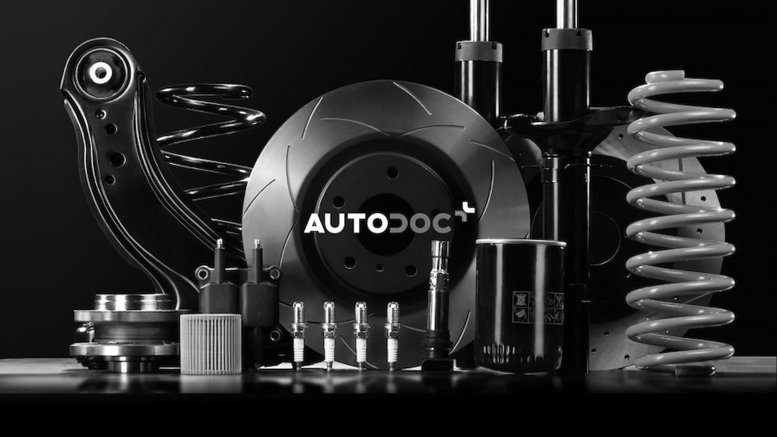


Negative image



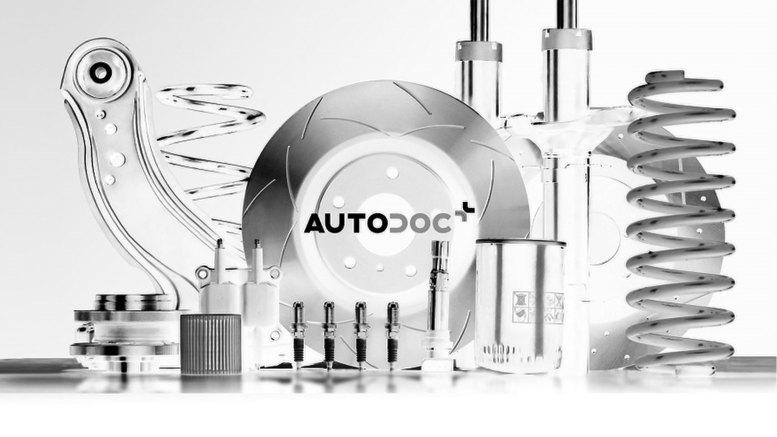


Binary image with threshold



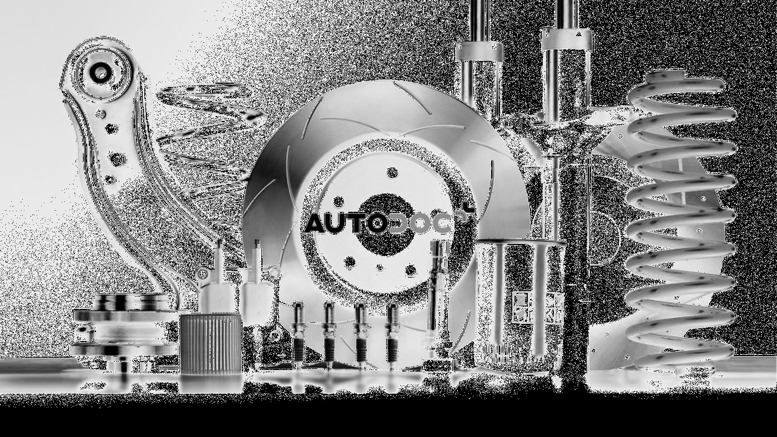

In [ ]:
def image_action(action):
  image, draw, width, height, pix = image_val()
  w,h = image.size
  compr = tuple(int(x/1.8) for x in image.size)

  for x in range(width):
    for y in range(height):
      r, g, b = pix[x, y]
      
      if action == 'bn':
        threshold = int(66*random.random())

        if (r+g+b) > threshold:
          sr = (r + g + b) // 3
          draw.point((x, y), (255-sr, 255-sr, 255-sr))

        else:
          sr = (r + g + b) // 3
          draw.point((x, y), (sr, sr, sr))

      else:
        sr = (r + g + b) // 3 

        if action == 'bw':
          draw.point((x, y), (sr, sr, sr))

        elif action == 'inv':
          draw.point((x, y), (255 - sr, 255 - sr, 255 - sr))

        else:
          raise ValueError('You\'re 100 years too early to be ready to handle this funtion!')
  
  return image.resize(compr)

print('\nBlack and White Image\n')
image_action('bw')

print('\nNegative image\n')
image_action('inv')

print('\nBinary image with threshold\n')
image_action('bn')

Same, but using the Power Of Libraries and ... loops.


Black and White Image



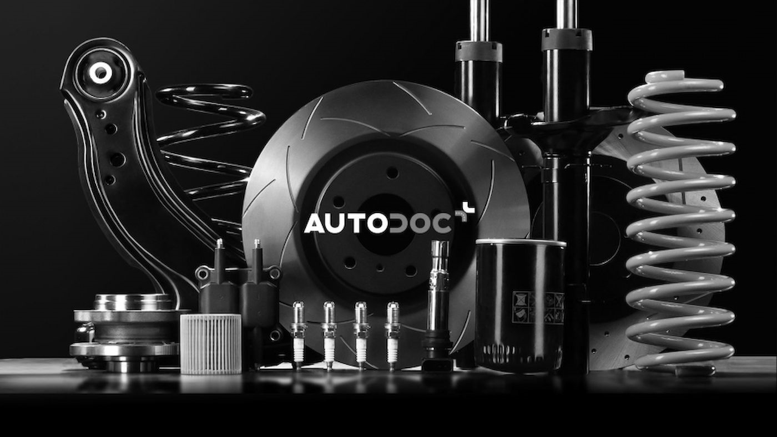


Negative from BW image



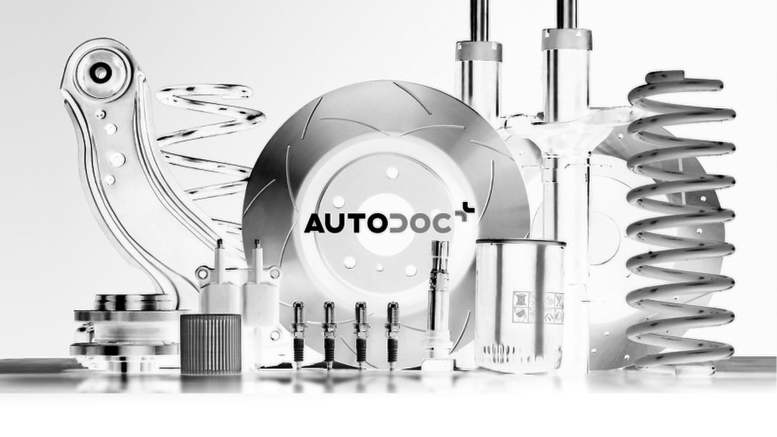


Binary image of BW image with threshold



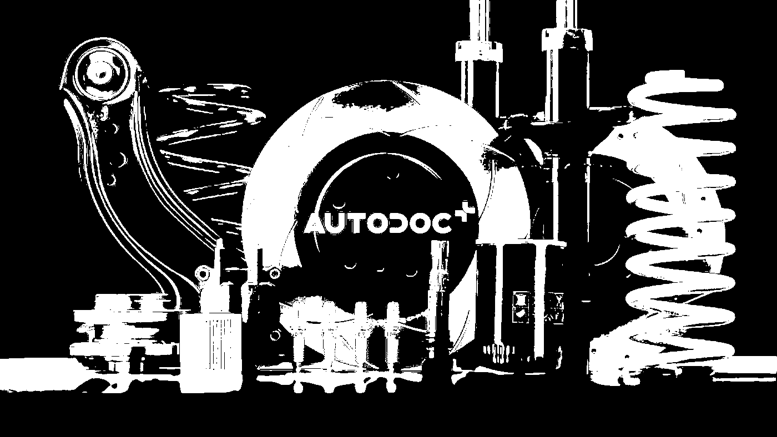

In [ ]:
def image_action_V2(action):
  image = Image.open('autodoc.png').convert('RGB').convert('L')
  compr = tuple(int(x/1.8) for x in image.size)
  
  if action == 'bn':
    threshold = int(66*random.random())
    return image.point(lambda x: 255 if x > threshold else 0).resize(compr)

  elif action == 'inv':
    return ImageOps.invert(image).resize(compr)

  else:
    return image.resize(compr)

print('\nBlack and White Image\n')
image_action_V2('bw')

print('\nNegative from BW image\n')
image_action_V2('inv')

print('\nBinary image of BW image with threshold\n')
image_action_V2('bn')

13. Уменьшите цветное изображение в 2 раза. *Используйте самый элементарный способ*.

До этого момента я уменьшал все картинки в 1.8 раза. Это было сделано чисто для вашего/моего удобства. Чтож уменьшим теперь в 2 раза.

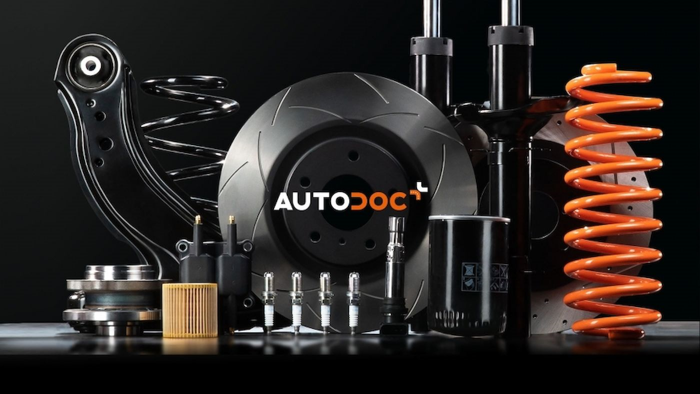

In [ ]:
Image.open('autodoc.png').convert('RGB').resize(tuple(int(x/2) for x in image.size))

14. Отразите цветное изображение по любой из осей.
15. Поверните на 90 градусов и отразите цветное изображение за константное время.

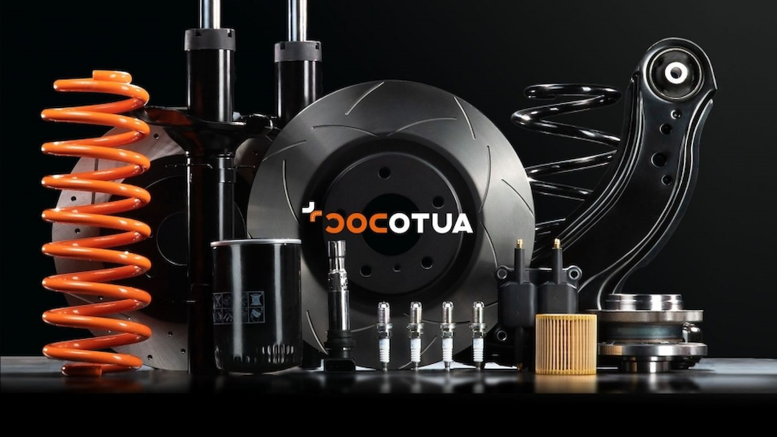

In [ ]:
image.transpose(Image.FLIP_LEFT_RIGHT).resize(compr)

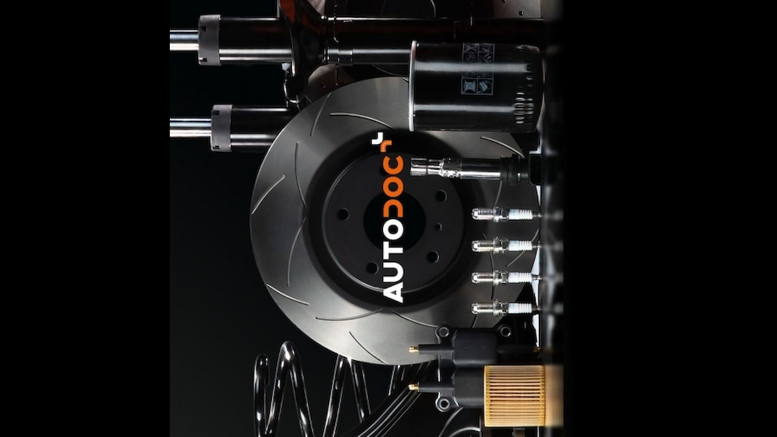

In [ ]:
image.rotate(90).resize(compr)

16. Преобразуйте картинку в матрицу, где строка - это пиксель изображения, а столбцы - это кординаты и значение RGB этого пикселя.

In [ ]:
image = np.array(Image.open('autodoc.png').convert('RGB'))
x, y, z = image.shape
indices = np.vstack(np.unravel_index(np.arange(x*y), (y, x))).T
np.hstack((image.reshape(x*y, z), indices))[:10,:]

array([[33, 35, 34,  0,  0],
       [33, 35, 34,  0,  1],
       [33, 35, 34,  0,  2],
       [33, 35, 34,  0,  3],
       [33, 35, 34,  0,  4],
       [33, 35, 34,  0,  5],
       [33, 35, 34,  0,  6],
       [33, 35, 34,  0,  7],
       [33, 35, 34,  0,  8],
       [33, 35, 34,  0,  9]])

## Оформление
Изучите и строго следуйте [PEP 8 Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/). Используйте возможности jupyter notebook для оформления отчета. Оформление кода и задачи в целом также учитывается.